In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_org = pd.read_excel("DATASET ROUND 1.....xlsx")
df = df_org.copy()

In [ ]:
df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AL,Albania,2005,2023,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0
1,711100,"Coffee, Green",AL,Albania,2005,2023,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0
2,711100,"Coffee, Green",AL,Albania,2005,2023,6,58,Bean Imports,2,(1000 60 KG BAGS),80.0
3,711100,"Coffee, Green",AL,Albania,2005,2023,6,20,Beginning Stocks,2,(1000 60 KG BAGS),0.0
4,711100,"Coffee, Green",AL,Albania,2005,2023,6,125,Domestic Consumption,2,(1000 60 KG BAGS),80.0


In [ ]:
df.describe()

,Commodity_Code,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Value
count,2.789120e+05,278912.000000,278912.000000,278912.000000,278912.000000,278912.000000,278912.000000
mean,1.214083e+06,1993.795007,2006.397000,5.735669,101.194395,11.947561,1347.666812
std,9.711028e+05,18.324434,13.694573,3.188677,59.056093,10.373231,11055.032172
min,4.400000e+05,1960.000000,1960.000000,0.000000,4.000000,2.000000,-2500.000000
25%,4.400000e+05,1978.000000,2006.000000,5.000000,57.000000,2.000000,0.000000
50%,7.111000e+05,1995.000000,2006.000000,6.000000,88.000000,8.000000,25.000000
75%,2.631000e+06,2010.000000,2015.000000,7.000000,154.000000,27.000000,300.000000
max,2.631000e+06,2023.000000,2023.000000,12.000000,195.000000,29.000000,505817.000000


In [ ]:
df.info

<bound method DataFrame.info of         Commodity_Code Commodity_Description Country_Code Country_Name  \
0               711100         Coffee, Green           AL      Albania   
1               711100         Coffee, Green           AL      Albania   
2               711100         Coffee, Green           AL      Albania   
3               711100         Coffee, Green           AL      Albania   
4               711100         Coffee, Green           AL      Albania   
...                ...                   ...          ...          ...   
278907         2631000                Cotton           RH     Zimbabwe   
278908         2631000                Cotton           RH     Zimbabwe   
278909         2631000                Cotton           RH     Zimbabwe   
278910         2631000                Cotton           RH     Zimbabwe   
278911         2631000                Cotton           RH     Zimbabwe   

        Market_Year  Calendar_Year  Month  Attribute_ID Attribute_Description  

In [ ]:
df.value_counts()

Commodity_Code  Commodity_Description  Country_Code  Country_Name  Market_Year  Calendar_Year  Month  Attribute_ID  Attribute_Description   Unit_ID  Unit_Description   Value
440000          Corn                   AF            Afghanistan   1960         2006           7      4             Area Harvested          4        (1000 HA)          500.0    1
711100          Coffee, Green          VE            Venezuela     1972         1972           0      75            Roast & Ground Imports  2        (1000 60 KG BAGS)  0.0      1
                                                                                                      114           Soluble Exports         2        (1000 60 KG BAGS)  0.0      1
                                                                                                      107           Roast & Ground Exports  2        (1000 60 KG BAGS)  1.0      1
                                                                                                      90      

In [ ]:
df['Unit_Description'].value_counts()

(1000 MT)             93743
(1000 60 KG BAGS)     82403
1000 480 lb. Bales    66258
(1000 HA)             14573
(PERCENT)              7362
(KG/HA)                7362
(MT/HA)                7211
Name: Unit_Description, dtype: int64

In [ ]:
df['ExportValue'] = df['Value'] * 1000

In [ ]:
df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value,ExportValue
0,711100,"Coffee, Green",AL,Albania,2005,2023,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0,0.0
1,711100,"Coffee, Green",AL,Albania,2005,2023,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0,0.0
2,711100,"Coffee, Green",AL,Albania,2005,2023,6,58,Bean Imports,2,(1000 60 KG BAGS),80.0,80000.0
3,711100,"Coffee, Green",AL,Albania,2005,2023,6,20,Beginning Stocks,2,(1000 60 KG BAGS),0.0,0.0
4,711100,"Coffee, Green",AL,Albania,2005,2023,6,125,Domestic Consumption,2,(1000 60 KG BAGS),80.0,80000.0


                      Country_Name       Value
Commodity_Description                         
Coffee, Green               Brazil   409921.00
Corn                         China  2257752.10
Cotton                       China   307791.43


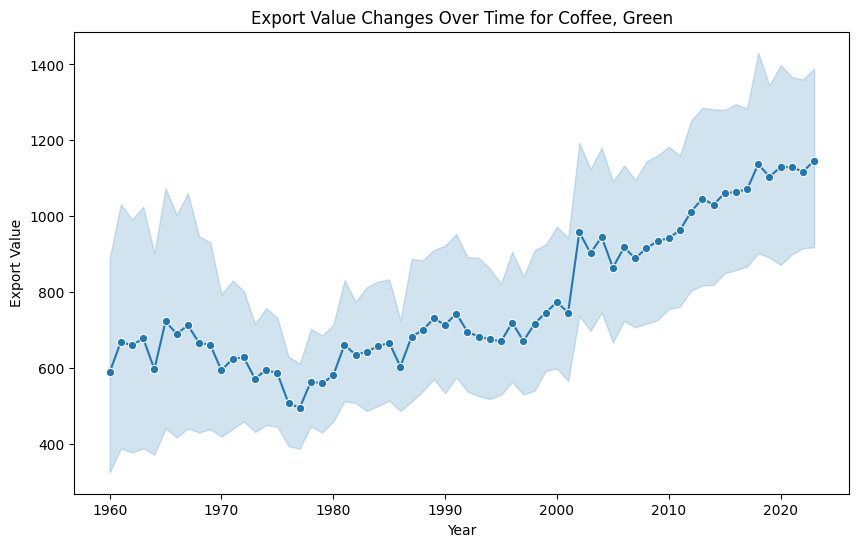

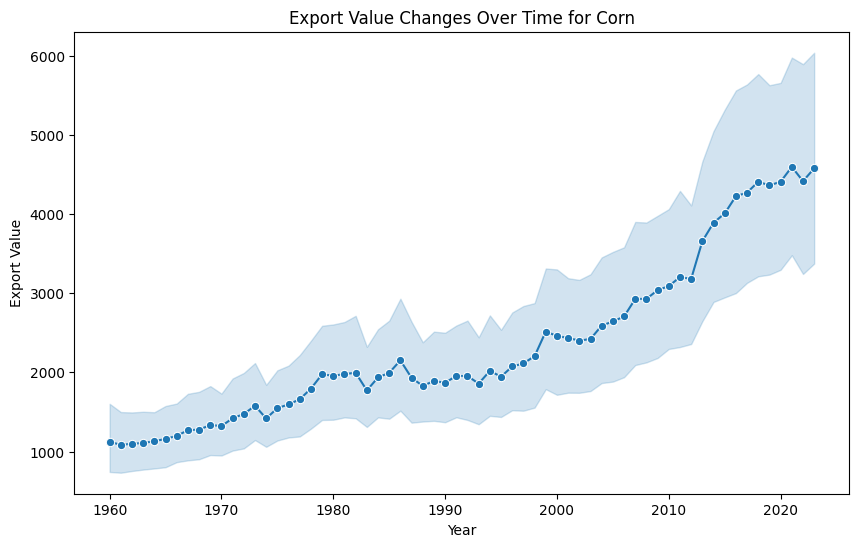

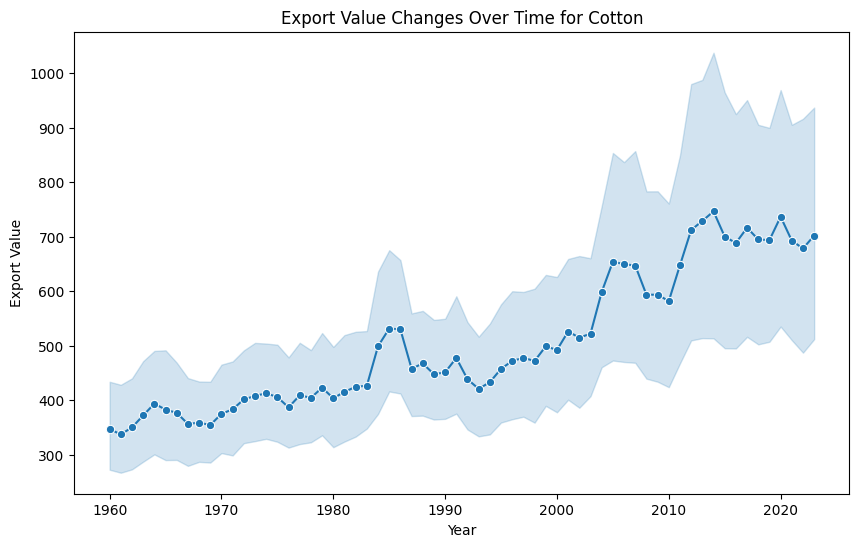

In [ ]:
# 1. Xác định quốc gia xuất khẩu lớn nhất cho mỗi loại hàng hóa trong năm 2018
exports_2018 = df[df['Market_Year'] == 2018]
top_exporters_2018 = exports_2018.groupby(['Commodity_Description', 'Country_Name'])['Value'].sum().reset_index()
top_exporters_2018 = top_exporters_2018.sort_values(by='Value', ascending=False).groupby('Commodity_Description').first()

# 2. So sánh giữa các quốc gia
print(top_exporters_2018)

# 3. Vẽ biểu đồ thể hiện sự thay đổi về xuất khẩu qua các năm
commodities = ['Coffee, Green', 'Corn', 'Cotton']
for commodity in commodities:
    commodity_data = df[df['Commodity_Description'] == commodity]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=commodity_data, x='Market_Year', y='Value', marker='o')
    plt.title(f'Export Value Changes Over Time for {commodity}')
    plt.ylabel('Export Value')
    plt.xlabel('Year')
    plt.show()

    Market_Year Commodity_Description       Value
0          2000         Coffee, Green   793935.00
1          2000                  Corn  4388795.15
2          2000                Cotton   738446.51
3          2001         Coffee, Green   793615.00
4          2001                  Corn  4344011.11
..          ...                   ...         ...
58         2019                  Corn  8175217.97
59         2019                Cotton  1023835.12
60         2020         Coffee, Green  1995760.00
61         2020                  Corn  8261604.39
62         2020                Cotton  1087074.56

[63 rows x 3 columns]


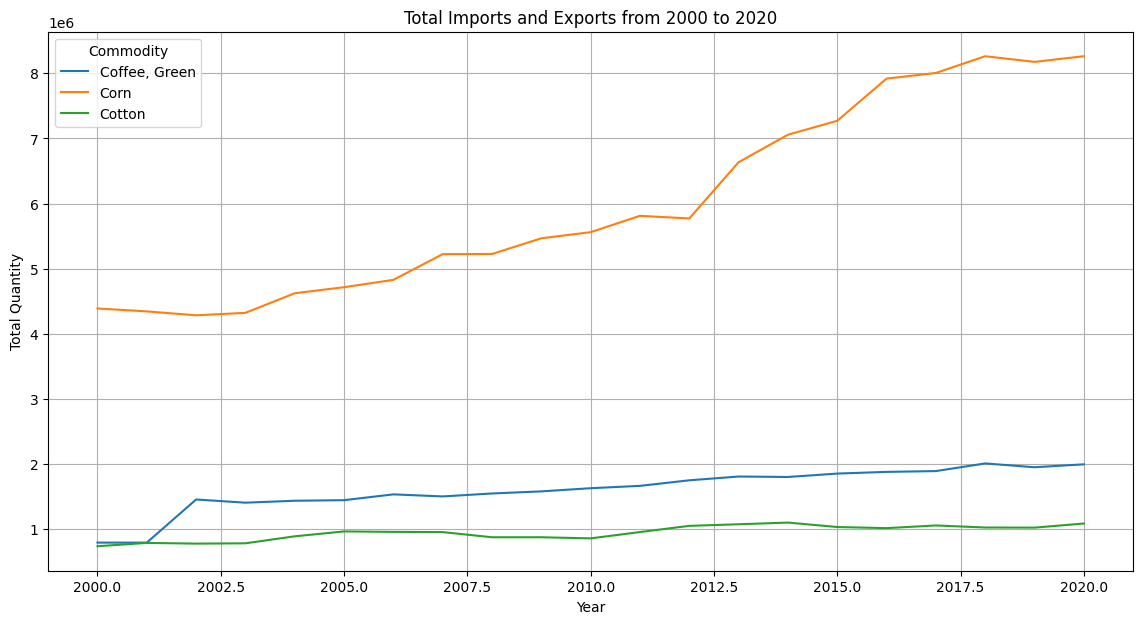

In [ ]:
# Lọc dữ liệu cho các mặt hàng cần thiết và khoảng thời gian từ năm 2000 đến 2020
commodities = ['Coffee, Green', 'Corn', 'Cotton']
df_filtered = df[(df['Commodity_Description'].isin(commodities)) &
                 (df['Market_Year'] >= 2000) &
                 (df['Market_Year'] <= 2020)]

# Lọc dữ liệu cho các mặt hàng Imports và Exports
import_export = df_filtered[df_filtered['Commodity_Description'].isin(['Import', 'Export'])]
# Tính tổng số lượng nhập khẩu và xuất khẩu cho mỗi mặt hàng theo năm
df_grouped = df_filtered.groupby(['Market_Year', 'Commodity_Description'])['Value'].sum().reset_index()
print(df_grouped)
# Biểu đồ hóa sự thay đổi trong thời gian
plt.figure(figsize=(14, 7))
for commodity in commodities:
    subset = df_grouped[df_grouped['Commodity_Description'] == commodity]
    plt.plot(subset['Market_Year'], subset['Value'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.title('Total Imports and Exports from 2000 to 2020')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()


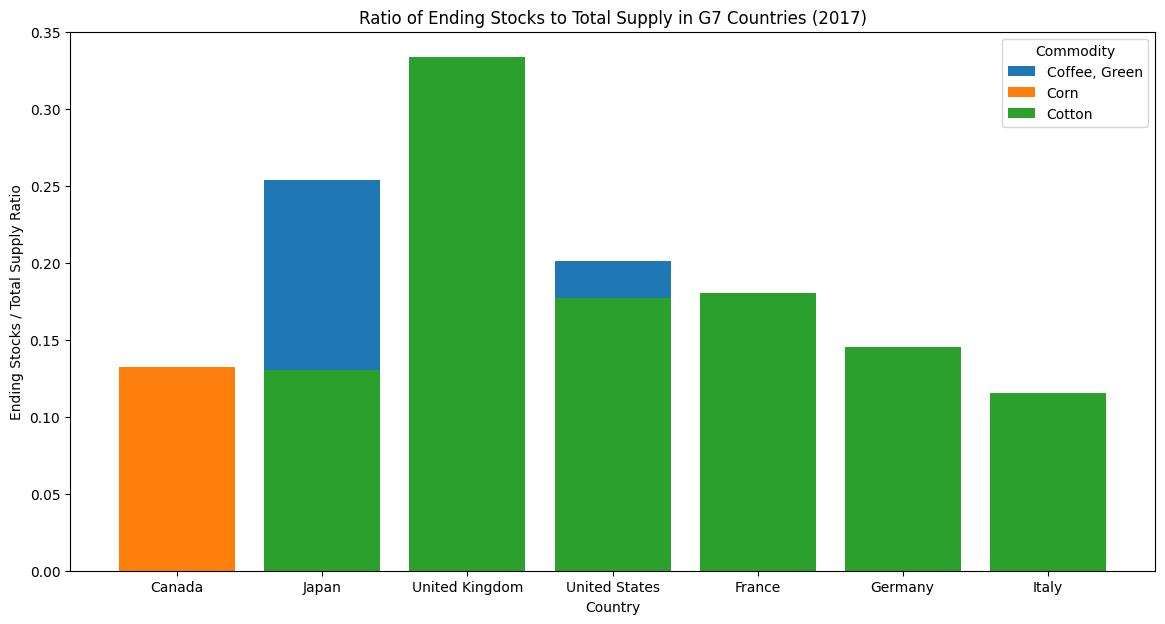

In [ ]:

# Lọc dữ liệu cho năm 2017 và các quốc gia G7
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
commodities = ['Coffee, Green', 'Corn', 'Cotton']
df_2017_g7 = df[(df['Market_Year'] == 2017) & (df['Country_Name'].isin(g7_countries)) & (df['Commodity_Description'].isin(commodities))]

# Tính tỷ lệ Ending Stocks / Total Supply
df_commodities_pivot = df_2017_g7.pivot_table(index=['Country_Name', 'Commodity_Description'], columns='Attribute_Description', values='Value', aggfunc='sum', fill_value=0)
df_commodities_pivot['Ratio'] = df_commodities_pivot['Ending Stocks'] / df_commodities_pivot['Total Supply']

# Biểu đồ hóa sự khác biệt
plt.figure(figsize=(14, 7))

for commodity in commodities:
    df_temp = df_commodities_pivot[df_commodities_pivot.index.get_level_values('Commodity_Description') == commodity]
    plt.bar(df_temp.index.get_level_values('Country_Name'), df_temp['Ratio'], label=commodity)

plt.title('Ratio of Ending Stocks to Total Supply in G7 Countries (2017)')
plt.xlabel('Country')
plt.ylabel('Ending Stocks / Total Supply Ratio')
plt.legend(title='Commodity')
plt.show()


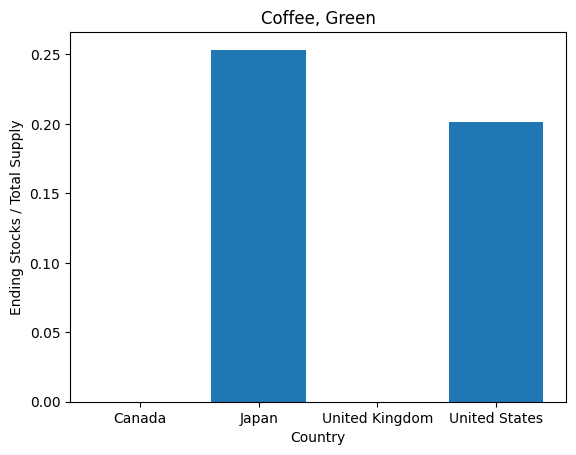

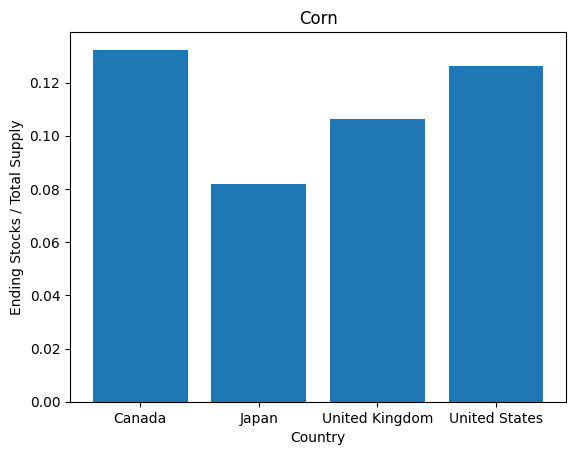

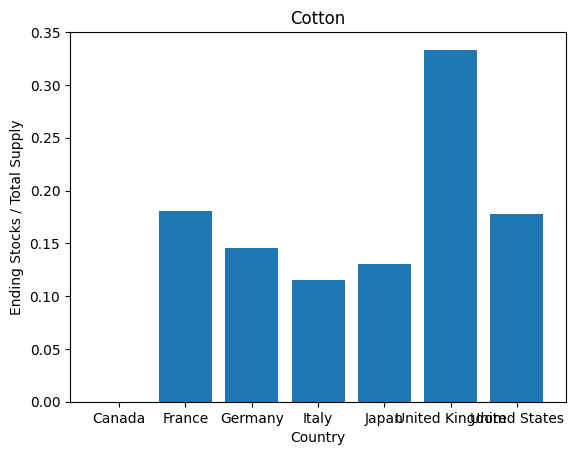

Country: Canada, Ratios: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.                nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.13235133
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.                nan]
Country: Japan, Ratios: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.25342404        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.08197493
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 

In [ ]:

# Lọc dữ liệu cho năm 2017 và các quốc gia G7
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
df_2017_g7 = df[(df['Market_Year'] == 2017) & (df['Country_Name'].isin(g7_countries))]

# Lọc dữ liệu cho các mặt hàng cần thiết
commodities = ['Coffee, Green', 'Corn', 'Cotton']
df_commodities = df_2017_g7[df_2017_g7['Commodity_Description'].isin(commodities)]

# Tính tỷ lệ Ending Stocks / Total Supply
# Tách DataFrame thành hai phần tương ứng với 'Total Supply' và 'Ending Stocks'
df_total_supply = df_commodities[df_commodities['Attribute_Description'] == 'Total Supply']
df_ending_stocks = df_commodities[df_commodities['Attribute_Description'] == 'Ending Stocks']

# Đảm bảo rằng DataFrames được sắp xếp theo thứ tự như nhau
df_total_supply = df_total_supply.sort_values('Commodity_Description')
df_ending_stocks = df_ending_stocks.sort_values('Commodity_Description')

# Tính toán tỷ lệ và thêm vào DataFrame 'Total Supply'
df_commodities['Ratio'] = df_ending_stocks['Value'].values / df_total_supply['Value']

# Vẽ biểu đồ
for commodity in commodities:
    df_temp = df_commodities[df_commodities['Commodity_Description'] == commodity]
    plt.bar(df_temp['Country_Name'], df_temp['Ratio'])
    plt.title(commodity)
    plt.xlabel('Country')
    plt.ylabel('Ending Stocks / Total Supply')
    plt.show()

for country in df_commodities['Country_Name'].unique():
    ratio_for_country = df_commodities[df_commodities['Country_Name'] == country]['Ratio'].values
    print(f'Country: {country}, Ratios: {ratio_for_country}')

In [ ]:

# Lọc dữ liệu cho khu vực Bắc Mỹ và Nam Mỹ và trong khoảng thời gian từ 2010 đến 2020
north_america_countries = ['United States', 'Canada', 'Mexico']  # Cập nhật danh sách quốc gia Bắc Mỹ
south_america_countries = ['Brazil', 'Argentina', 'Colombia']  # Cập nhật danh sách quốc gia Nam Mỹ

df_filtered = df[
    ((df['Country_Name']== 'North America') ) |
    ((df['Country_Name'] == 'South America')) &
    ((df['Market_Year'] >= 2010) & (df['Market_Year'] <= 2020))
]

# Tính tổng lượng Corn Yield cho từng khu vực
df_grouped = df_filtered.groupby('Market_Year'])['Value'].sum().reset_index()

# Hiển thị sự khác biệt giữa Bắc Mỹ và Nam Mỹ
north_america_yield = df_grouped[df_grouped['Area'] == 'North America']['Value'].sum()
south_america_yield = df_grouped[df_grouped['Area'] == 'South America']['Value'].sum()

print(f'Total Corn Yield in North America: {north_america_yield}')
print(f'Total Corn Yield in South America: {south_america_yield}')
print(f'Difference: {abs(north_america_yield - south_america_yield)}')


KeyError: ignored